In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import math
import re
from re import X
from scipy.optimize import minimize


def lire():
    with open('hamza_test', 'r') as file:
        lines = file.read()
        

        
    lines = lines.replace("|", ".")
    lines = lines.replace(":", ".")
    lines = lines.replace("53L5A1", "")

    lines = lines.replace("X", "0")

    lines = re.sub(r'[^0-9.]', '', lines)


    lines = lines.split('.')

    lines = [i for i in lines if i != '']   

    res=[eval(i) for i in lines]

    #print(res)

    n = len(res)//4

    data = np.zeros((n, 4), dtype = int)

    up = []
    down = []

    for i in range(len(res)):
        j = i%32
        if j >= 16:
            
            down.append(res[i])
        else:
            up.append(res[i])

    print(len(up)/64, len(down)/64)
    # assert len(up) == len(down) 
    #print(up)
    #print(down)

    for i in range(len(up)):
        
        if i%2 == 0:
            data[i//2, 0] = up[i]
            data[i//2, 2] = down[i]
        else:
            data[i//2, 1] = up[i]
            data[i//2, 3] = down[i]
        
    #print('resultat',data.reshape(-1,64,4))
    #print("mes resultat",data)
    return data
Data=lire()
print(Data[:  , 0])


276.0 276.0
[1175 1160 1153 ... 1154 1136 1163]


In [3]:

Data=lire()
n=len(Data)
print(n)
i=0
myList=[]
while i < n-8:
    Matrix8X8=np.empty((8, 8) , dtype=object)
    for j in range(8):
        for k in range(8):
            Matrix8X8[j,k]= (Data[i]) 
            i=i+1  
            
    myList.append(Matrix8X8)
    #print ("*******************ma matrice" ,i/64, "********************\n", myList,"\n","*******************************\n")
    #print("la matrice\n", Matrix8X8)
    #print("la listeest ",int ((i-64)/64)) #,Matrix8X8[0][0][0])             
    #return myList          
#print("myliste est ",(myList))
#print("myliste est \n",(myList))
num_matrice=0
num_line=7
num_colon=7
#print("test",(myList[num_matrice][num_line][num_colon])[0])


276.0 276.0
8832


In [32]:

def chgt_coord(mat ,i):
    
    global mat1
    x_mat, y_mat = np.meshgrid(np.arange(8), np.arange(8))
    x_mat = x_mat.flatten()
    y_mat = y_mat.flatten()
    z_mat = mat[i:i + 64]
    return [x_mat,y_mat,z_mat]





x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1175 1160 1153 1157 1146 1145 1160 1161 1155 1143 1150 1150 1151 1148
 1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152
 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142
 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147
 1160 1158 1146 1145 1147 1143 1152 1166]


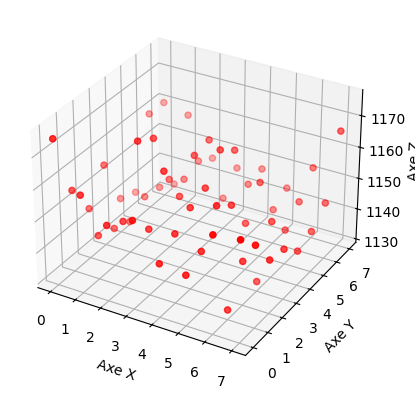

In [5]:


def visualisation_3D(mat_xyz):
    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez les données en 3D
    ax.scatter(mat_xyz[0], mat_xyz[1], mat_xyz[2], c='r', marker='o')

    # Étiquetez les axes
    ax.set_xlabel('Axe X')
    ax.set_ylabel('Axe Y')
    ax.set_zlabel('Axe Z')

    # Affichez la figure
    plt.show()
visualisation_3D(chgt_coord(Data[:, 0],0))

In [6]:

def chgt_coord1(mat):
    mat_x = [[0 for _ in range(8)] for _ in range(8)]
    mat_y = [[0 for _ in range(8)] for _ in range(8)]
    mat_z = [[0 for _ in range(8)] for _ in range(8)]

    # Angle de transformation (64 degrés divisé par 8, puis divisé par 2)
    theta=60/8
    angle = theta*(math.pi/180)

    # Décalage en déclinaison
    mat_dec_phi = [-4, -3, -2, -1, 1, 2, 3, 5]
    mat_dec_theta = [8, 7, 6, 5, 4, 3, 2, 1]

    for i in range(8):
        for j in range(8):
            # R est la valeur de la distance radiale dans le repère polaire
            R = mat[i][j][0]
            # Calcul des coordonnées cartésiennes
            A = math.sin(math.radians(mat_dec_theta[i] * angle))
            B = math.cos(math.radians(mat_dec_theta[i] * angle))
            C = math.sin(math.radians(mat_dec_phi[j] * angle))
            D = math.cos(math.radians(mat_dec_phi[j] * angle))

            mat_x[i][j] = R * A * D
            mat_y[i][j] = R * A * C
            mat_z[i][j] = R * B

    return  [mat_x,  mat_y,  mat_z]



x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1151 1148 1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139
 1168 1152 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140
 1138 1142 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140
 1145 1147 1160 1158 1146 1145 1147 1143 1152 1166 1172 1164 1154 1150
 1142 1147 1159 1168 1154 1135 1149 1153]


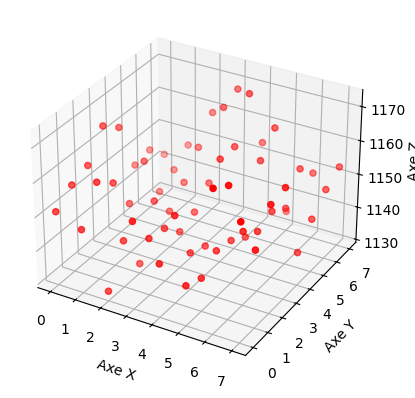

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1148 1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168
 1152 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138
 1142 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145
 1147 1160 1158 1146 1145 1147 1143 1152 1166 1172 1164 1154 1150 1142
 1147 1159 1168 1154 1135 1149 1153 1151]


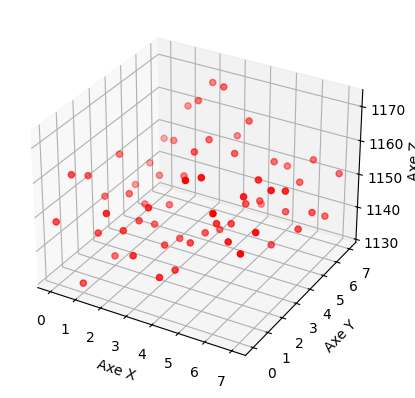

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152
 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142
 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147
 1160 1158 1146 1145 1147 1143 1152 1166 1172 1164 1154 1150 1142 1147
 1159 1168 1154 1135 1149 1153 1151 1151]


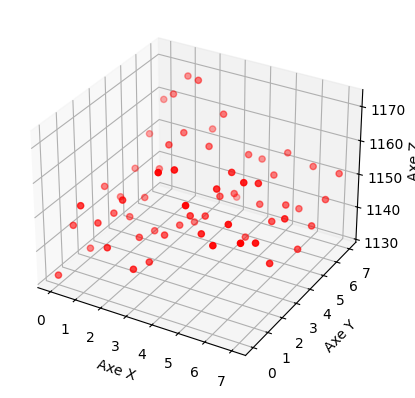

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152 1157
 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142 1147
 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147 1160
 1158 1146 1145 1147 1143 1152 1166 1172 1164 1154 1150 1142 1147 1159
 1168 1154 1135 1149 1153 1151 1151 1146]


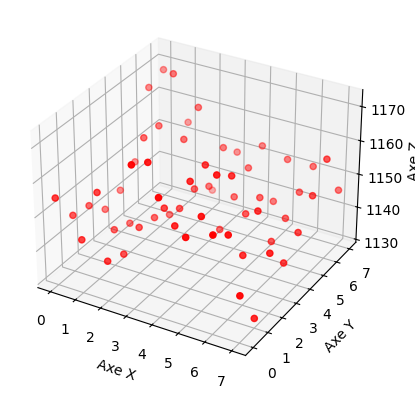

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152 1157 1154
 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142 1147 1162
 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147 1160 1158
 1146 1145 1147 1143 1152 1166 1172 1164 1154 1150 1142 1147 1159 1168
 1154 1135 1149 1153 1151 1151 1146 1154]


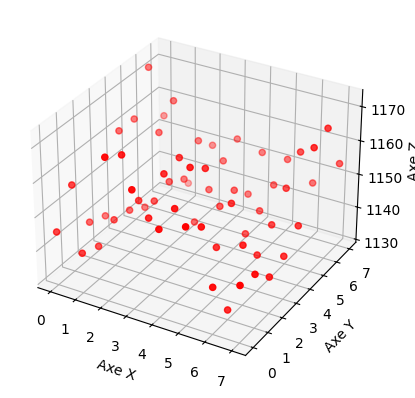

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152 1157 1154 1132
 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142 1147 1162 1161
 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147 1160 1158 1146
 1145 1147 1143 1152 1166 1172 1164 1154 1150 1142 1147 1159 1168 1154
 1135 1149 1153 1151 1151 1146 1154 1148]


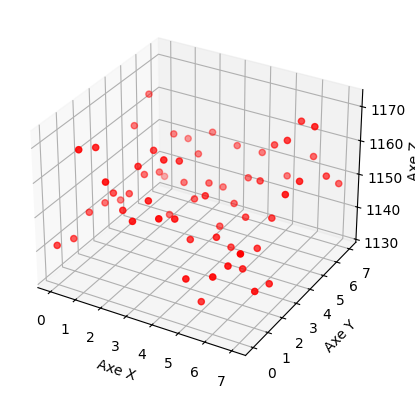

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1171 1164 1155 1158 1143 1146 1155 1139 1168 1152 1157 1154 1132 1145
 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142 1147 1162 1161 1153
 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147 1160 1158 1146 1145
 1147 1143 1152 1166 1172 1164 1154 1150 1142 1147 1159 1168 1154 1135
 1149 1153 1151 1151 1146 1154 1148 1149]


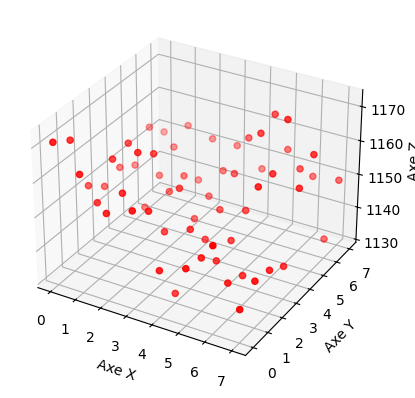

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1164 1155 1158 1143 1146 1155 1139 1168 1152 1157 1154 1132 1145 1140
 1143 1151 1161 1165 1144 1147 1140 1138 1142 1147 1162 1161 1153 1140
 1142 1160 1139 1149 1139 1146 1140 1145 1147 1160 1158 1146 1145 1147
 1143 1152 1166 1172 1164 1154 1150 1142 1147 1159 1168 1154 1135 1149
 1153 1151 1151 1146 1154 1148 1149 1160]


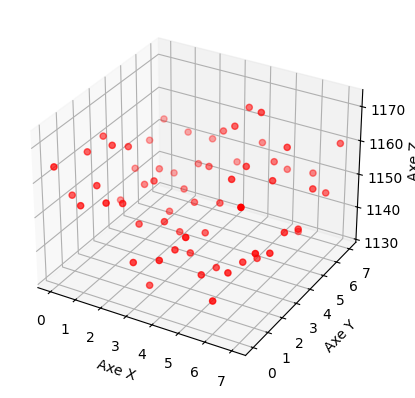

In [7]:
for i in range(12,20):
    visualisation_3D(chgt_coord(Data[:, 0],i))

64


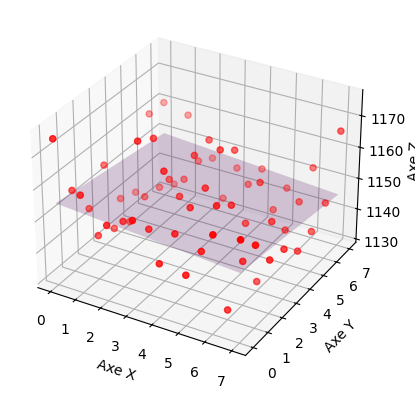

In [33]:


# Vos données en coordonnées cartésiennes (x, y, z)
data = np.array(chgt_coord(Data[:, 0],0))  # Remplacez ceci par vos propres données

# Modèle de plan : z = ax + by + c
def plane(params, data):
    a, b, c = params
    x, y, z = data
    return a * x + b * y + c

# Fonction d'erreur à minimiser
def error(params, data):
    return np.sum((plane(params, data) - data[2]) ** 2)

# Estimation des coefficients du plan
initial_guess = [0, 0, 0]  # Vous pouvez initialiser les valeurs ici
result = minimize(error, initial_guess, args=(data,), method='BFGS')
a, b, c = result.x

# Création du plan
x_range = np.linspace(np.min(data[0]), np.max(data[0]), 64)
print(len(x_range))
y_range = np.linspace(np.min(data[1]), np.max(data[1]), 64)
z_range=np.linspace(np.min(data[2]), np.max(data[2]), 64)
xx, yy = np.meshgrid(x_range, y_range)
zz = a * xx + b * yy + c

# Tracé du plan et des points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.2, rstride=64, cstride=64, cmap='viridis')
ax.scatter(data[0], data[1], data[2], c='r', marker='o')

# Étiquetage des axes
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')

plt.show()


x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1175 1160 1153 1157 1146 1145 1160 1161 1155 1143 1150 1150 1151 1148
 1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152
 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142
 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147
 1160 1158 1146 1145 1147 1143 1152 1166]
Coefficient a : -0.6011904711527326
Coefficient b : -0.7440475926491892
Coefficient c : 1155.0833331585557


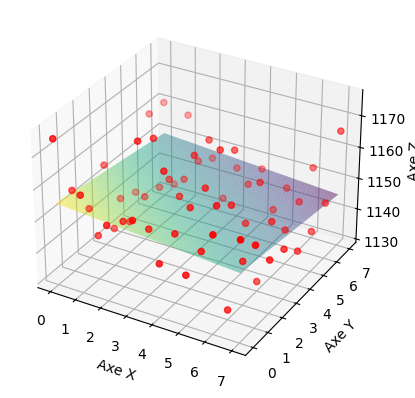

In [9]:
data = np.array(chgt_coord(Data[:, 0],0))

# Modèle de plan : z = ax + by + c
def plane(params, data):
    a, b, c = params
    x, y, z = data
    return a * x + b * y + c

# Fonction d'erreur à minimiser
def error(params, data):
    return np.sum((plane(params, data) - data[2]) ** 2)

# Estimation des coefficients du plan
initial_guess = [0, 0, 0]  # Vous pouvez initialiser les valeurs ici
result = minimize(error, initial_guess, args=(data,), method='BFGS')
a, b, c = result.x


# Création du plan
x_range = np.linspace(np.min(data[0]), np.max(data[0]), 6000)
y_range = np.linspace(np.min(data[1]), np.max(data[1]), 6000)
xx, yy = np.meshgrid(x_range, y_range)
zz  = a * xx + b * yy + c 
print(f"Coefficient a : {a}")
print(f"Coefficient b : {b}")
print(f"Coefficient c : {c}")
# Tracé du plan et des points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=64, cstride=64, cmap='viridis')
ax.scatter(data[0], data[1], data[2], c='r', marker='o')

# Étiquetage des axes
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')

plt.show()


La fonction des moindres carrés est une technique utilisée pour trouver la meilleure approximation linéaire d'un modèle en ajustant les coefficients d'un modèle linéaire aux données observées. Si vous avez un modèle de la forme `y = ax + bz + c`, vous pouvez utiliser la méthode des moindres carrés pour ajuster les coefficients `a`, `b`, et `c` aux données que vous avez.

Voici comment vous pouvez le faire :

1. Collectez vos données : Vous devez avoir un ensemble de données avec des valeurs pour `y`, `x`, `z`.

2. Définissez votre modèle : Vous avez déjà défini votre modèle comme `y = ax + bz + c`.

3. Définissez votre fonction d'erreur : Pour la méthode des moindres carrés, vous devez définir une fonction d'erreur qui mesure la différence entre les valeurs prédites par votre modèle et les valeurs réelles de `y`. La fonction d'erreur la plus couramment utilisée est la somme des carrés des résidus. Elle est définie comme suit :

   E(a, b, c) = Σ(y_i - (ax_i + bz_i + c))^2

   où Σ représente la somme sur toutes les données, et (x_i, z_i, y_i) sont les données individuelles.

4. Minimisez la fonction d'erreur : Pour ajuster les coefficients `a`, `b`, et `c` à vos données, vous devez minimiser la fonction d'erreur. Cela peut se faire à l'aide de méthodes numériques telles que la méthode des moindres carrés ordinaires ou des outils de calcul symbolique.

Une fois que vous avez minimisé la fonction d'erreur, les valeurs des coefficients `a`, `b`, et `c` qui en résultent seront les meilleures approximations linéaires de votre modèle aux données que vous avez collectées.

Il est important de noter que ce processus est généralement effectué à l'aide de logiciels statistiques ou de calcul formel, car il implique des calculs mathématiques complexes pour minimiser la fonction d'erreur.

x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1175 1160 1153 1157 1146 1145 1160 1161 1155 1143 1150 1150 1151 1148
 1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152
 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142
 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147
 1160 1158 1146 1145 1147 1143 1152 1166]
****************** 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]] 
 ****************** 
 ****************** [[1175]
 [11

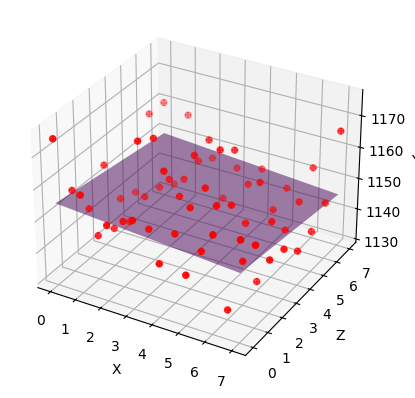

In [10]:
# Données d'exemple (vous devez remplacer ces données par les vôtres)
data = np.array(chgt_coord(Data[:, 0],0)) 
x = data[0]
z = data[1]
y = data[2]
    # Créez une grille 3D pour représenter le plan

# Assurez-vous que les données x, z et y sont bidimensionnelles
x = x.reshape(-1, 1)

z = z.reshape(-1, 1)
y = y.reshape(-1, 1)
print("******************","\n",x,"\n","******************","\n","******************",y,"******************","\n","******************","\n","******************","\n","******************",z,"******************","\n","******************")

# Créez une matrice de conception X avec x, z et un vecteur y
X = np.column_stack((x, z, np.ones_like(x)))
print(X)
# Utilisez la formule des moindres carrés pour calculer les coefficients a, b et c
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
a, b, c = coefficients

# Les coefficients a, b et c sont maintenant calculés
print(f"Coefficient a : {a}")
print(f"Coefficient b : {b}")
print(f"Coefficient c : {c}")
def plot_3d_plane(a, b, c, x, z, y):
    
    X, Z = np.meshgrid(np.linspace(min(x), max(x), 8), np.linspace(min(z), max(z), 8))
    Y = a[0] * X + b[0] * Z + c[0]

    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez le plan
    ax.plot_surface(X, Z, Y, alpha=0.5, rstride=100, cstride=100, cmap='viridis')

    # Tracez les points de données
    ax.scatter(x, z, y, color='red', marker='+')
    ax.scatter(data[0], data[1], data[2], c='r', marker='o')
    print(X,"\n","******************",Y,"\n","******************",Z)
    # Définissez les étiquettes des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    # Affichez le graphique
    plt.show()
plot_3d_plane(a, b, c, x, z, y)


x_mat [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]
y_mat [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]
mat [1175 1160 1153 1157 1146 1145 1160 1161 1155 1143 1150 1150 1151 1148
 1132 1155 1145 1141 1171 1164 1155 1158 1143 1146 1155 1139 1168 1152
 1157 1154 1132 1145 1140 1143 1151 1161 1165 1144 1147 1140 1138 1142
 1147 1162 1161 1153 1140 1142 1160 1139 1149 1139 1146 1140 1145 1147
 1160 1158 1146 1145 1147 1143 1152 1166]
0 0 [1155.08333333]


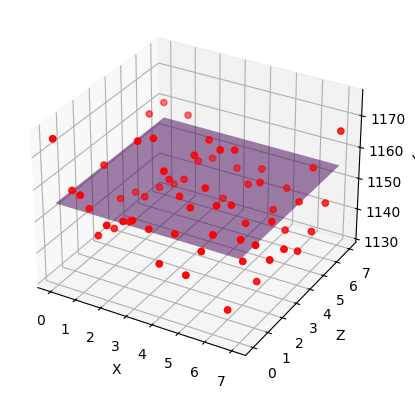

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_plane(a, b, c, x, z, y):
    
    X, Z = np.meshgrid(np.linspace(min(x), max(x), 8), np.linspace(min(z), max(z), 8))
    Y = a * X + b * Z + c

    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez le plan
    ax.plot_surface(X, Z, Y, alpha=0.5, rstride=100, cstride=100, cmap='viridis')

    # Tracez les points de données
    ax.scatter(x, z, y, color='red', marker='o')
    ax.scatter(data[0], data[1], data[2], c='r', marker='o')

    # Définissez les étiquettes des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    # Affichez le graphique
    plt.show()

# Données d'exemple (vous devez remplacer ces données par les vôtres)
data = np.array(chgt_coord(Data[:, 0],0)) 
x = data[0]
z = data[1]
y = data[2]
"""x =np.array([1167.70129888, 1154.55587723, 1148.75640699, 1153.32769806, 1142.36261191, 1140.78585083, 1154.55587723 ,1153.78826212])
y = np.array([ 92.60655388,  65.33630298,  38.97842299 , 13.04009103 ,-12.91611437, -38.70797426 ,-65.33630298, -91.50315664])
z = np.array([-92.3184856 , -91.27920833, -90.82070211, -91.18210846, -90.31520855, -90.19054979, -91.27920833, -91.21852066])"""



# Assurez-vous que les données x, z et y sont bidimensionnelles
x = x.reshape(-1, 1)
z = z.reshape(-1, 1)
y = y.reshape(-1, 1)

# Créez une matrice de conception X avec x, z et un vecteur y
X = np.column_stack((x, z, np.ones_like(x)))

# Utilisez la formule des moindres carrés pour calculer les coefficients a, b et c
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
a,b, c = coefficients
print(int(a),int (b),c)

plot_3d_plane(int(a), int(b) , c, x, z, y)




In [137]:

moy = np.sum(Data[:, 0])/len(Data[:, 0])


In [138]:
def trouver_theta(z_mat, moy):
    theta = np.empty((64))
    for i in range(64):
        if z_mat[i] > moy:
            z_mat[i] = moy
            theta[i]=(0)
        else:
            t =z_mat[i]/moy
            theta[i]=(math.acos(t))
    return z_mat , theta

In [140]:
z_mat , theta = trouver_theta(Data[0:64,0], moy)
mat_change = np.empty((64))
for i in range(64):
    mat_change[i] = z_mat[i] * math.sin(theta[i])
print(mat_change)

[ 18.90846299  18.90846299  18.90846299  18.90846299 108.33647474
 118.24923985  18.90846299  18.90846299  18.90846299 135.81409845
  51.51012098  51.51012098  18.90846299  84.94063094 205.64833787
  18.90846299 118.24923985 151.22411723  18.90846299  18.90846299
  18.90846299  18.90846299 135.81409845 108.33647474  18.90846299
 165.0843453   18.90846299  18.90846299  18.90846299  18.90846299
 205.64833787 118.24923985 158.32141872 135.81409845  18.90846299
  18.90846299  18.90846299 127.35423697  97.36944097 158.32141872
 171.55250679 143.74284826  97.36944097  18.90846299  18.90846299
  18.90846299 158.32141872 143.74284826  18.90846299 165.0843453
  70.278583   165.0843453  108.33647474 158.32141872 118.24923985
  97.36944097  18.90846299  18.90846299 108.33647474 118.24923985
  97.36944097 135.81409845  18.90846299  18.90846299]


In [148]:
def trouver_phi(mat_change):
    
    moy_x =(np.sum(mat_change)**2/64)
    phi = np.empty((64))
    x_mat = np.empty((64))
    for i in range(64):
        if mat_change[i] > moy_x:
            x_mat[i] = moy_x
            phi[i]=(0)
        else:
            t = mat_change[i] / moy_x
            phi[i]=(math.acos(t))
    return phi, x_mat 
print(trouver_phi(mat_change)[0])

[1.57074871 1.57074871 1.57074871 1.57074871 1.57052352 1.57049856
 1.57074871 1.57074871 1.57074871 1.57045432 1.57066662 1.57066662
 1.57074871 1.57058243 1.57027847 1.57074871 1.57049856 1.57041552
 1.57074871 1.57074871 1.57074871 1.57074871 1.57045432 1.57052352
 1.57074871 1.57038062 1.57074871 1.57074871 1.57074871 1.57074871
 1.57027847 1.57049856 1.57039765 1.57045432 1.57074871 1.57074871
 1.57074871 1.57047563 1.57055113 1.57039765 1.57036433 1.57043436
 1.57055113 1.57074871 1.57074871 1.57074871 1.57039765 1.57043436
 1.57074871 1.57038062 1.57061935 1.57038062 1.57052352 1.57039765
 1.57049856 1.57055113 1.57074871 1.57074871 1.57052352 1.57049856
 1.57055113 1.57045432 1.57074871 1.57074871]


In [149]:
phi = trouver_phi(mat_change)[0]
y_mat = np.empty((64))
for i in range(64):
    y_mat[i] = mat_change[i] * math.sin(phi[i])
x_mat = trouver_phi(mat_change)[1]

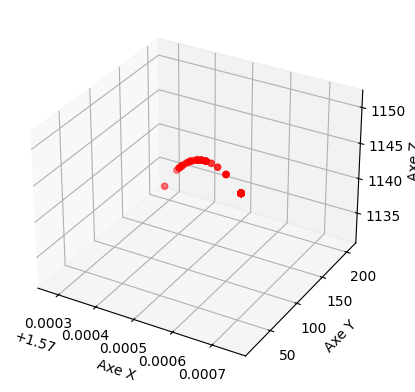

In [150]:
 # Créez une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracez les données en 3D
ax.scatter(x_mat, y_mat ,z_mat, c='r', marker='o')


# Étiquetez les axes
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')

# Affichez la figure
plt.show()